In [1]:
import sys
sys.path.append("../")
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20.0, 16.0) 

## black level estimation

In [2]:
# rIm=read_raw("lowlight_frame47_rg10.raw", frame = 47)
# print(rIm.shape, rIm.dtype)
bk_lvl = 50
print("black level of the sensor: ", bk_lvl)

black level of the sensor:  50


## low light single frame demosaicking

In [3]:
rIm=read_raw("lowlight3_frame47_rg10.raw", frame = 16)
rIm_single = rIm[8] - bk_lvl
rIm_single = np.clip(rIm_single, 0, 1023)
print_stat("rIm_single",rIm_single)
bit_length = np.log2(rIm_single.max())
print("bit_length", bit_length)

rIm_single  shape:  (2174, 3864) dtype: int16
rIm_single stat: max: 27, min: 0, mean: 6.996874529780714, std: 3.4508870433831533
bit_length 4.7548876


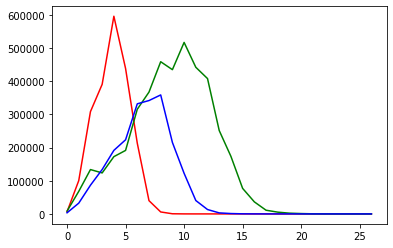

In [4]:
plot_histogram(rIm_single, bit_length)

In [5]:
rgbIm_single = demosaic(rIm_single)

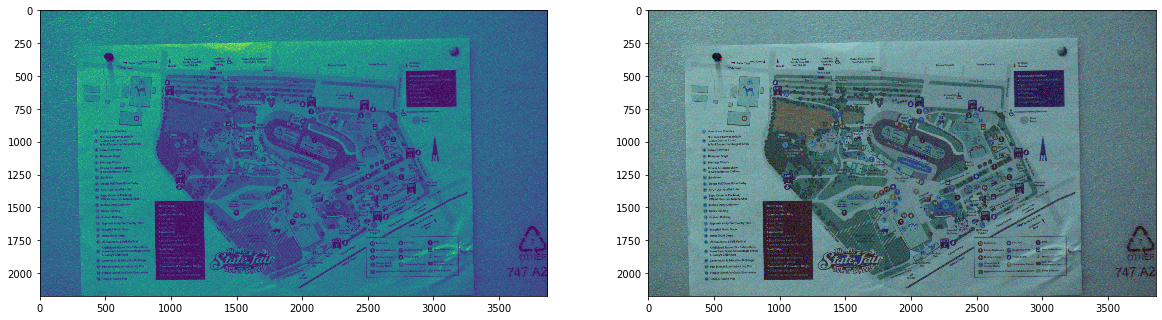

In [6]:
rgbIm_adj_single = adjustColor(rgbIm_single,rc = 1, bc = 1, gc = 0.7, gain=1.3, gamma = 1.25, contrast=1.5)
fig, ax = plt.subplots(1, 2, figsize=(20, 16))
ax[0].imshow(rIm_single)
ax[1].imshow(rgbIm_adj_single)
plt.show()

## stack and demosaicking

In [7]:
rIm_sum = rIm.sum(axis = 0) - bk_lvl * rIm.shape[0]
print_stat("rIm_sum", rIm_sum)
bit_length = np.log2(rIm_sum.max())
print("bit_length", bit_length)

rIm_sum  shape:  (2174, 3864) dtype: int64
rIm_sum stat: max: 438, min: 2, mean: 111.97315095491419, std: 53.29283881678876
bit_length 8.774787059601174


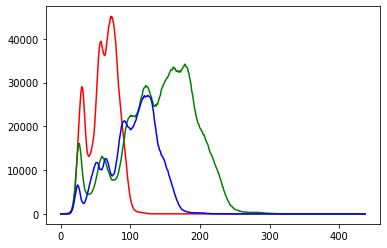

In [8]:
plot_histogram(rIm_sum, bit_length)

In [9]:
rIm_sum = np.clip(rIm_sum, 0, 1023)

In [10]:
rgbIm = demosaic(rIm_sum)

In [11]:
rgbIm_adj = adjustColor(rgbIm,rc = 1, bc = 1, gc = 0.7, gain=1.3, gamma = 1.25, contrast=1.5)

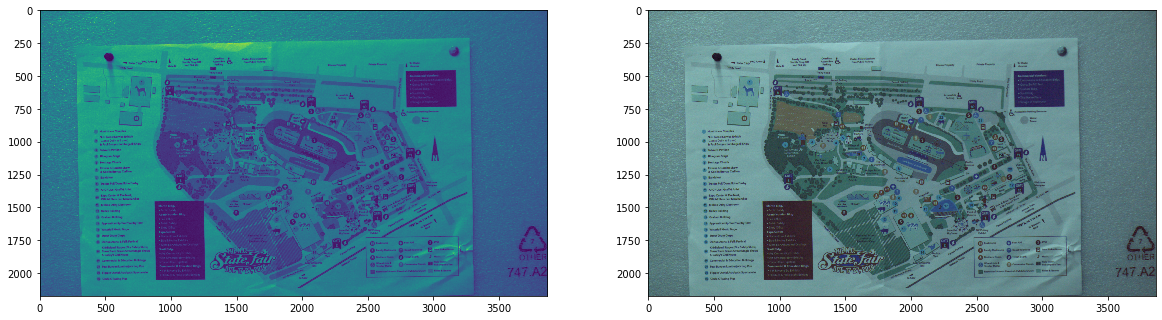

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 16))
ax[0].imshow(rIm_sum)
ax[1].imshow(rgbIm_adj)
plt.show()

## comparison

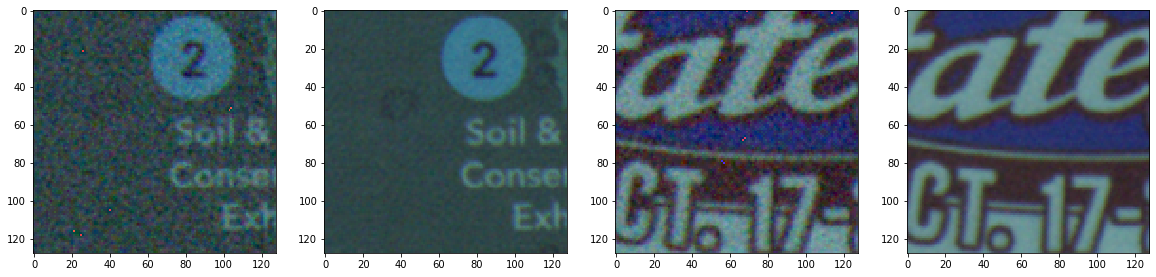

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(20, 16))
ax[0].imshow(rgbIm_adj_single[1000:1128, 960:1088])
ax[1].imshow(rgbIm_adj[1000:1128, 960:1088])
ax[2].imshow(rgbIm_adj_single[2000-128:2000, 1500-64:1500+64])
ax[3].imshow(rgbIm_adj[2000-128:2000, 1500-64:1500+64])
plt.show()

# With mild camera motion (tremor)
## single frame

In [15]:
rIm=read_raw("lowlight3_frame47_tremor_rg10_2.raw", frame = 16)
rIm_single = rIm[8] - bk_lvl
rIm_single = np.clip(rIm_single, 0, 1023)
print_stat("rIm_single",rIm_single)

rIm_single  shape:  (2174, 3864) dtype: int16
rIm_single stat: max: 32, min: 0, mean: 6.66817493966908, std: 3.280477335613503


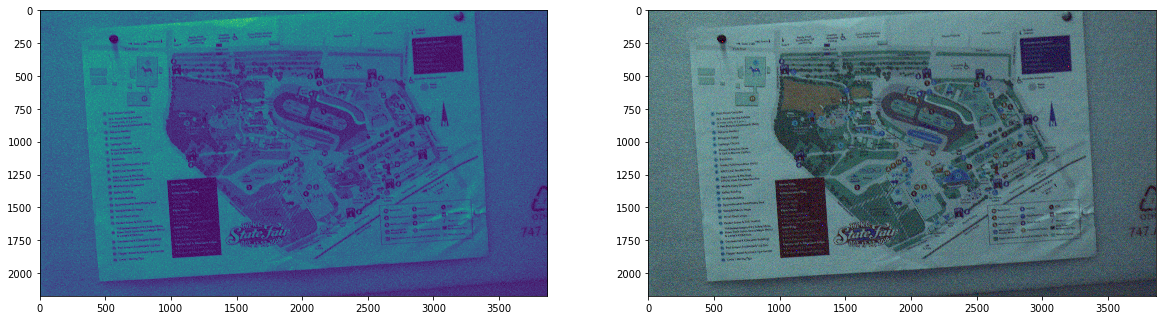

In [16]:
rgbIm_single = demosaic(rIm_single)
rgbIm_adj_single = adjustColor(rgbIm_single,rc = 1, bc = 1, gc = 0.7, gain=1.3, gamma = 1.25, contrast=1.5)
fig, ax = plt.subplots(1, 2, figsize=(20, 16))
ax[0].imshow(rIm_single)
ax[1].imshow(rgbIm_adj_single)
plt.show()

## stack

In [17]:
rIm_sum = rIm.sum(axis = 0) - rIm.shape[0]*bk_lvl
rIm_sum = np.clip(rIm_sum, 0, 1023)
print_stat("rIm_sum",rIm_sum)

rIm_sum  shape:  (2174, 3864) dtype: int64
rIm_sum stat: max: 469, min: 4, mean: 106.50881845678553, std: 49.171026069090125


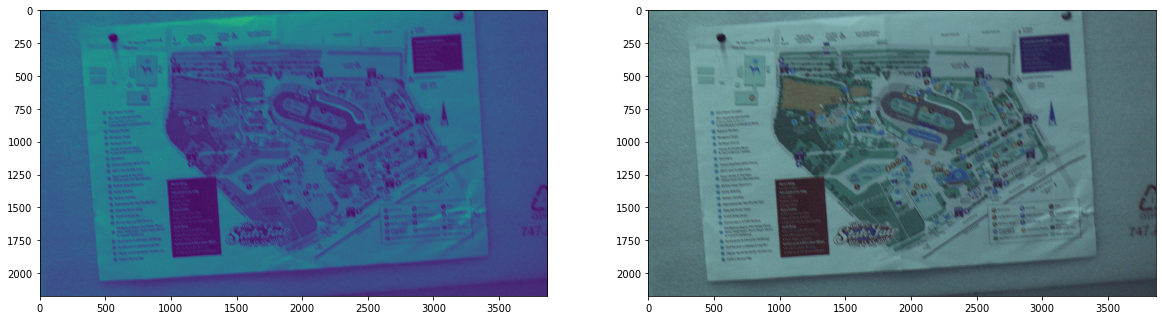

In [18]:
rgbIm = demosaic(rIm_sum)
rgbIm_adj = adjustColor(rgbIm,rc = 1, bc = 1, gc = 0.7, gain=1.3, gamma = 1.25, contrast=1.5)
fig, ax = plt.subplots(1, 2, figsize=(20, 16))
ax[0].imshow(rIm_sum)
ax[1].imshow(rgbIm_adj)
plt.show()

## comparison

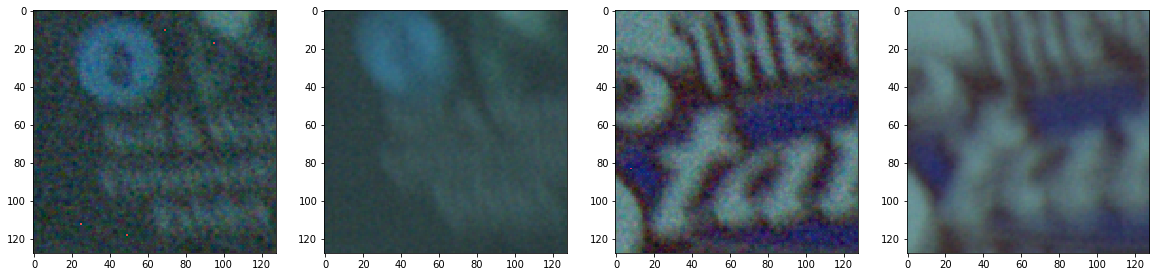

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(20, 16))
ax[0].imshow(rgbIm_adj_single[960-128:960, 1200-128:1200])
ax[1].imshow(rgbIm_adj[960-128:960, 1200-128:1200])
ax[2].imshow(rgbIm_adj_single[1750-128:1750, 1500:1628])
ax[3].imshow(rgbIm_adj[1750-128:1750, 1500:1628])
plt.show()